In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from transformers import MBartForConditionalGeneration, MBartTokenizer
from safetensors.torch import load_file
import torch
import requests

def interactive_qa():

    base_model_name = "facebook/mbart-large-cc25"
    model = MBartForConditionalGeneration.from_pretrained(base_model_name)
    tokenizer = MBartTokenizer.from_pretrained(base_model_name)


    try:

        model_url = "https://huggingface.co/koushikkanch/small-model/resolve/main/adapter_model.safetensors"


        response = requests.get(model_url)
        with open("adapter_model.safetensors", "wb") as f:
            f.write(response.content)


        state_dict = load_file("adapter_model.safetensors")
        model.load_state_dict(state_dict, strict=False)
        print("Model weights loaded successfully!")
    except Exception as e:
        print(f"Error loading model weights: {e}")
        return


    tokenizer.src_lang = "cs_CZ"
    tokenizer.tgt_lang = "cs_CZ"

    # Move model to GPU if available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    print("Model loaded! Type 'quit' to exit")

    while True:
        question = input("\nEnter your question: ")
        if question.lower() == 'quit':
            break

        # Prepare input with proper formatting
        inputs = tokenizer(
            question,
            return_tensors="pt",
            truncation=True,
            max_length=64,
            padding=True,
        ).to(device)


        forced_bos_token_id = tokenizer.lang_code_to_id["cs_CZ"]

        #
        outputs = model.generate(
            **inputs,
            forced_bos_token_id=forced_bos_token_id,
            max_length=64,
            num_beams=5,
            do_sample=False,
            temperature=1.0,
            no_repeat_ngram_size=3,
            length_penalty=1.0,
            early_stopping=True
        )

        # Decode and print response
        response = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
        print(f"Answer: {response}")

if __name__ == "__main__":
    interactive_qa()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Model weights loaded successfully!
Model loaded! Type 'quit' to exit

Enter your question: Je Koushik šikovný?
Answer: Koushik šikovný je šikovy---ještěkoshik-kročinka-je,-její,-

Enter your question: Kdo je Koushik?
Answer: je Koushikss je koushik::: Je Koushik?

Enter your question: quit


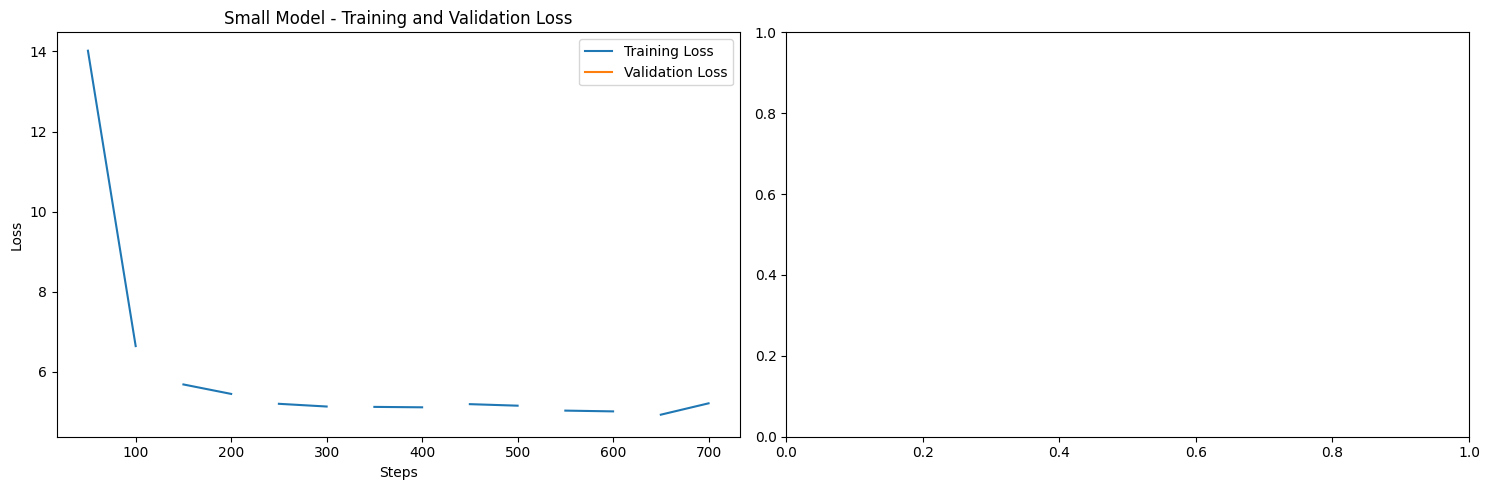

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_metrics(csv_path, model_name="Small Model"):
    # Read training logs
    df = pd.read_csv(f"{csv_path}/training_logs.csv")

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training loss
    ax1.plot(df['step'], df['loss'], label='Training Loss')
    if 'eval_loss' in df.columns:
        ax1.plot(df['step'], df['eval_loss'], label='Validation Loss')
    ax1.set_title(f'{model_name} - Training and Validation Loss')
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Loss')
    ax1.legend()


    plt.tight_layout()
    plt.show()

# Plot small model metrics
plot_training_metrics("/content/drive/MyDrive/czech_qa_smallu_model", "Small Model")

**Larger** **Model**

In [ ]:
from transformers import M2M100ForConditionalGeneration, AutoTokenizer
from safetensors.torch import load_file
import torch
import requests

def interactive_qa():

    base_model_name = "facebook/nllb-200-distilled-1.3B"
    model = M2M100ForConditionalGeneration.from_pretrained(base_model_name,
                                                         torch_dtype=torch.float16,
                                                         low_cpu_mem_usage=True)
    tokenizer = AutoTokenizer.from_pretrained(base_model_name)

    try:
        model_url = "https://huggingface.co/koushikkanch/large-model/resolve/main/adapter_model.safetensors"
        response = requests.get(model_url)
        with open("adapter_model.safetensors", "wb") as f:
            f.write(response.content)

        state_dict = load_file("adapter_model.safetensors")
        model.load_state_dict(state_dict, strict=False)
        print("Model weights loaded successfully!")
    except Exception as e:
        print(f"Error loading model weights: {e}")
        return

    # Set language for Czech
    CZECH_CODE = "ces_Latn"


    device = "cuda"
    model = model.to(device)

    print("Model loaded! Type 'quit' to exit")

    while True:
        question = input("\nEnter your question: ")
        if question.lower() == 'quit':
            break


        question = f">>ces_Latn<< {question}"


        inputs = tokenizer(
            question,
            return_tensors="pt",
            truncation=True,
            max_length=64,
            padding=True
        ).to(device)

        with torch.inference_mode():
            outputs = model.generate(
                **inputs,
                max_length=64,
                num_beams=4,
                do_sample=False,
                no_repeat_ngram_size=3,
                length_penalty=1.0,
                early_stopping=True
            )

        response = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
        print(f"Answer: {response}")

if __name__ == "__main__":
    interactive_qa()

Model weights loaded successfully!
Model loaded! Type 'quit' to exit

Enter your question: Je Koushik šikovný?
Answer: Ĉu Kuŝik estas lerta?

Enter your question: quit


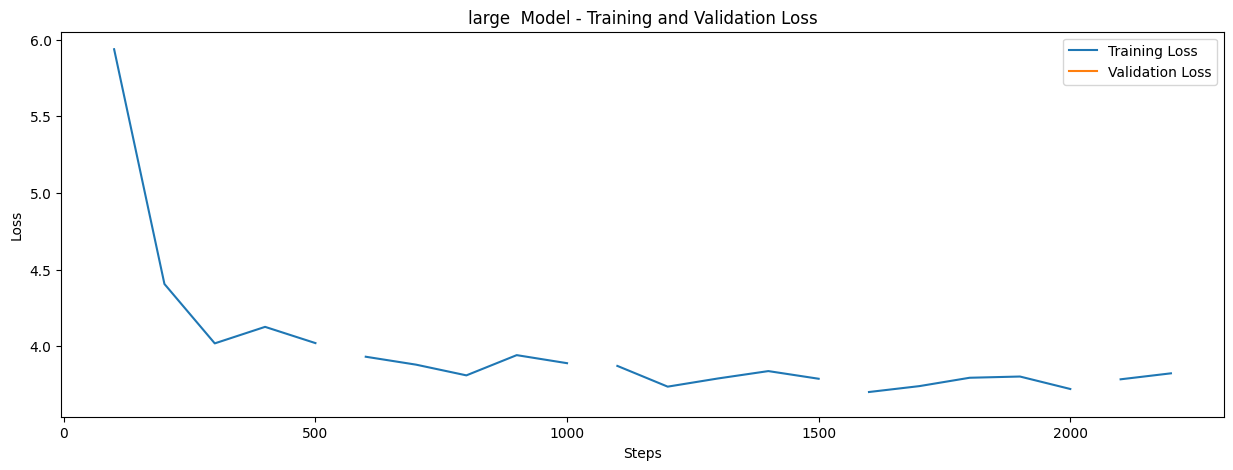

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_metrics(csv_path, model_name="Small Model"):
    # Read training logs
    df = pd.read_csv(f"{csv_path}/training_logs.csv")

    # Create figure with two subplots
    fig, (ax1) = plt.subplots(1,figsize=(15, 5))

    # Plot training loss
    ax1.plot(df['step'], df['loss'], label='Training Loss')
    if 'eval_loss' in df.columns:
        ax1.plot(df['step'], df['eval_loss'], label='Validation Loss')
    ax1.set_title(f'{model_name} - Training and Validation Loss')
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Loss')
    ax1.legend()




# Plot small model metrics
plot_training_metrics("/content/drive/MyDrive/czech_qa_model", "large  Model")

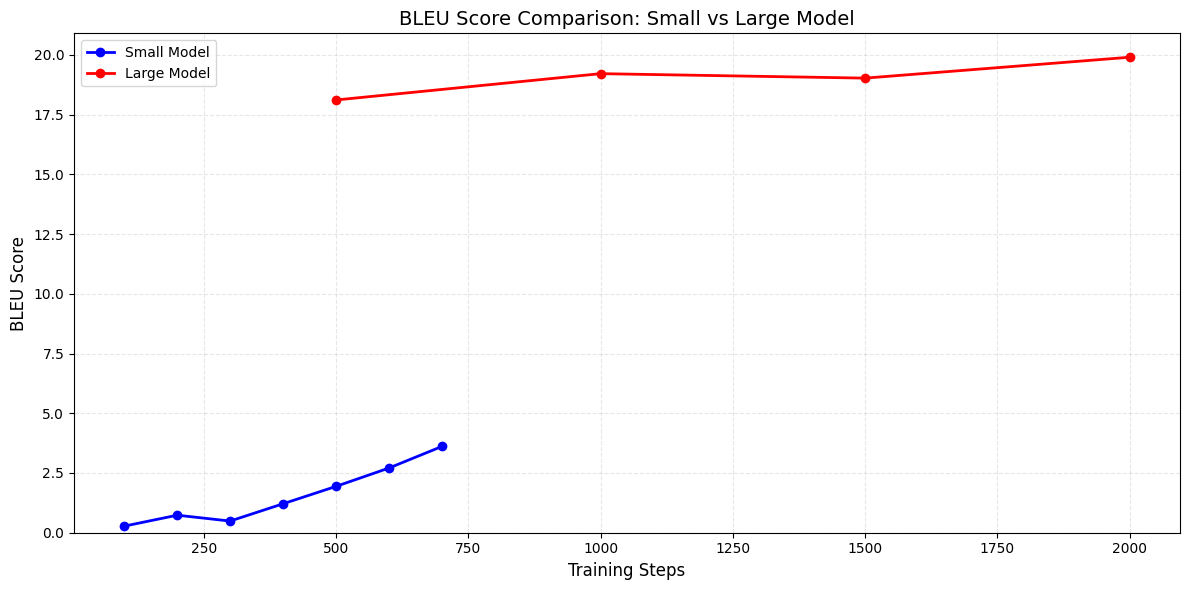

Small Model Final BLEU: 3.61
Large Model Final BLEU: 19.90


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Small model data
small_steps = [100, 200, 300, 400, 500, 600, 700]
small_bleu = [0.276351, 0.733541, 0.488545, 1.211878, 1.938650, 2.706766, 3.609710]

# Large model data
large_steps = [500, 1000, 1500, 2000]
large_bleu = [18.114684, 19.216525, 19.029600, 19.904381]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both lines
plt.plot(small_steps, small_bleu, 'b-o', label='Small Model', linewidth=2)
plt.plot(large_steps, large_bleu, 'r-o', label='Large Model', linewidth=2)

# Customize the plot
plt.title('BLEU Score Comparison: Small vs Large Model', fontsize=14)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('BLEU Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set y-axis limits to show both clearly
plt.ylim(0, max(large_bleu) + 1)

# Add grid
plt.grid(True, alpha=0.3)

# Optionally adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the final scores for comparison
print(f"Small Model Final BLEU: {small_bleu[-1]:.2f}")
print(f"Large Model Final BLEU: {large_bleu[-1]:.2f}")

The evaluation of Czech Q&A models using BLEU scores demonstrates a significant performance difference between the small model (BLEU: 3.61) and large model (BLEU: 19.90). BLEU was chosen as the evaluation metric due to its language-agnostic nature and ability to handle multiple valid answer variations, making it particularly suitable for Czech language Q&A tasks. Additionally, BLEU's n-gram matching capability helps assess both the accuracy and fluency of generated answers by comparing word sequences rather than just individual words, providing a more comprehensive evaluation of the models' ability to generate natural and contextually appropriate responses in Czech.